Solución analítica del trabajo: 8.0000 J

n = 6:
  Aproximación Simpson: 8.000000 J
  Error absoluto: 0.000000 J
  Error relativo: 0.0000 %

n = 10:
  Aproximación Simpson: 8.000000 J
  Error absoluto: 0.000000 J
  Error relativo: 0.0000 %

n = 20:
  Aproximación Simpson: 8.000000 J
  Error absoluto: 0.000000 J
  Error relativo: 0.0000 %

n = 30:
  Aproximación Simpson: 8.000000 J
  Error absoluto: 0.000000 J
  Error relativo: 0.0000 %



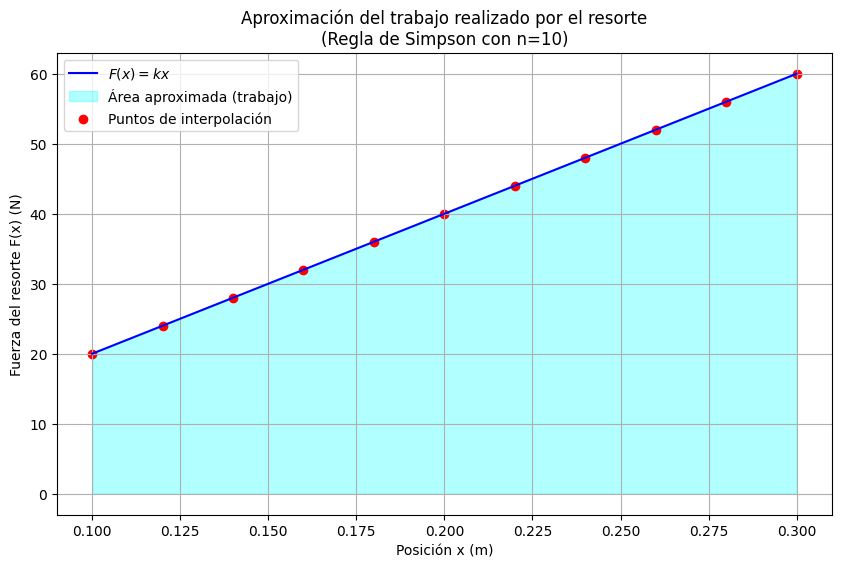

In [2]:
#   Codigo que implementa el metodo de la regla de Simpson
#   para aproximar la integral
#
#
#           Autor:
#   Cristian Yuseff Pinto Villanueva
#   cristian.pino9844@gmail.com
#   Version 1.0 : 23/03/2025
#
# EJERCICIO1

import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # Puntos del intervalo
    fx = f(x)  # Evaluamos la función en esos puntos

    # Regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])

    return integral

# Función que define la fuerza del resorte (F = kx)
def fuerza_resorte(x):
    k = 200  # Constante del resorte en N/m
    return k * x

# Parámetros del problema
a, b = 0.1, 0.3  # Posiciones inicial y final en metros
n_values = [6, 10, 20, 30]  # Diferentes valores de n a probar

# Solución analítica para comparación
def trabajo_analitico(a, b):
    k = 200
    return 0.5 * k * (b**2 - a**2)

sol_analitica = trabajo_analitico(a, b)
print(f"Solución analítica del trabajo: {sol_analitica:.4f} J\n")

# Calcular para diferentes valores de n
for n in n_values:
    resultado = simpson_rule(fuerza_resorte, a, b, n)
    error = abs(resultado - sol_analitica)
    print(f"n = {n}:")
    print(f"  Aproximación Simpson: {resultado:.6f} J")
    print(f"  Error absoluto: {error:.6f} J")
    print(f"  Error relativo: {error/sol_analitica*100:.4f} %\n")

# Gráfica de la función y la aproximación con n=10 (como ejemplo)
n_ejemplo = 10
x_vals = np.linspace(a, b, 100)
y_vals = fuerza_resorte(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$F(x) = kx$", color="blue")
plt.fill_between(x_vals, y_vals, alpha=0.3, color="cyan", label="Área aproximada (trabajo)")
plt.scatter(np.linspace(a, b, n_ejemplo+1),
            fuerza_resorte(np.linspace(a, b, n_ejemplo+1)),
            color="red", label="Puntos de interpolación")
plt.xlabel("Posición x (m)")
plt.ylabel("Fuerza del resorte F(x) (N)")
plt.title("Aproximación del trabajo realizado por el resorte\n(Regla de Simpson con n=10)")
plt.legend()
plt.grid()

# Guardar la figura
plt.savefig("trabajo_resorte.png")
plt.show()

Solución analítica de la carga almacenada: 0.00005000 C

n = 6:
  Aproximación Simpson: 0.0000515932 C
  Error absoluto: 0.0000015954 C
  Error relativo: 3.191037 %

n = 10:
  Aproximación Simpson: 0.0000502456 C
  Error absoluto: 0.0000002478 C
  Error relativo: 0.495718 %

n = 20:
  Aproximación Simpson: 0.0000500146 C
  Error absoluto: 0.0000000169 C
  Error relativo: 0.033715 %

n = 30:
  Aproximación Simpson: 0.0000500011 C
  Error absoluto: 0.0000000034 C
  Error relativo: 0.006769 %



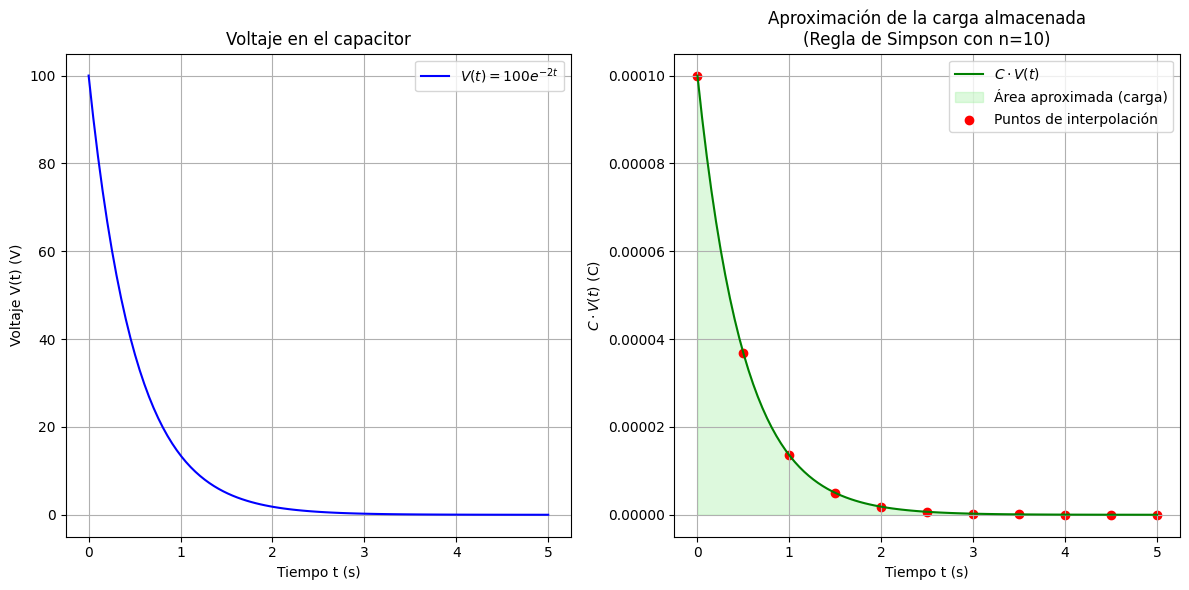

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # Puntos del intervalo
    fx = f(x)  # Evaluamos la función en esos puntos

    # Regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])

    return integral

# Parámetros del problema
C = 1e-6  # Capacitancia en Faradios (10^-6 F)
T = 5     # Tiempo final en segundos

# Función que define el voltaje V(t) = 100e^(-2t)
def voltaje(t):
    return 100 * np.exp(-2 * t)

# Función para calcular la carga (integral de C*V(t))
def funcion_integrando(t):
    return C * voltaje(t)

# Solución analítica para comparación
def carga_analitica(T):
    return C * 100 * (1 - np.exp(-2 * T)) / 2

sol_analitica = carga_analitica(T)
print(f"Solución analítica de la carga almacenada: {sol_analitica:.8f} C\n")

# Valores de n a probar
n_values = [6, 10, 20, 30]

# Calcular para diferentes valores de n
for n in n_values:
    resultado = simpson_rule(funcion_integrando, 0, T, n)
    error = abs(resultado - sol_analitica)
    print(f"n = {n}:")
    print(f"  Aproximación Simpson: {resultado:.10f} C")
    print(f"  Error absoluto: {error:.10f} C")
    print(f"  Error relativo: {error/sol_analitica*100:.6f} %\n")

# Gráfica de la función y la aproximación con n=10 (como ejemplo)
n_ejemplo = 10
t_vals = np.linspace(0, T, 100)
v_vals = voltaje(t_vals)
q_vals = funcion_integrando(t_vals)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_vals, v_vals, label=r"$V(t) = 100e^{-2t}$", color="blue")
plt.xlabel("Tiempo t (s)")
plt.ylabel("Voltaje V(t) (V)")
plt.title("Voltaje en el capacitor")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_vals, q_vals, label=r"$C \cdot V(t)$", color="green")
plt.fill_between(t_vals, q_vals, alpha=0.3, color="lightgreen", label="Área aproximada (carga)")
plt.scatter(np.linspace(0, T, n_ejemplo+1),
            funcion_integrando(np.linspace(0, T, n_ejemplo+1)),
            color="red", label="Puntos de interpolación")
plt.xlabel("Tiempo t (s)")
plt.ylabel(r"$C \cdot V(t)$ (C)")
plt.title("Aproximación de la carga almacenada\n(Regla de Simpson con n=10)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig("carga_capacitor.png")
plt.show()

Solución analítica del flujo de calor: -100.0000 W

n = 6:
  Aproximación Simpson: -100.000000 W
  Error absoluto: 0.000000 W
  Error relativo: -0.000000 %

n = 10:
  Aproximación Simpson: -100.000000 W
  Error absoluto: 0.000000 W
  Error relativo: -0.000000 %

n = 20:
  Aproximación Simpson: -100.000000 W
  Error absoluto: 0.000000 W
  Error relativo: -0.000000 %

n = 30:
  Aproximación Simpson: -100.000000 W
  Error absoluto: 0.000000 W
  Error relativo: -0.000000 %



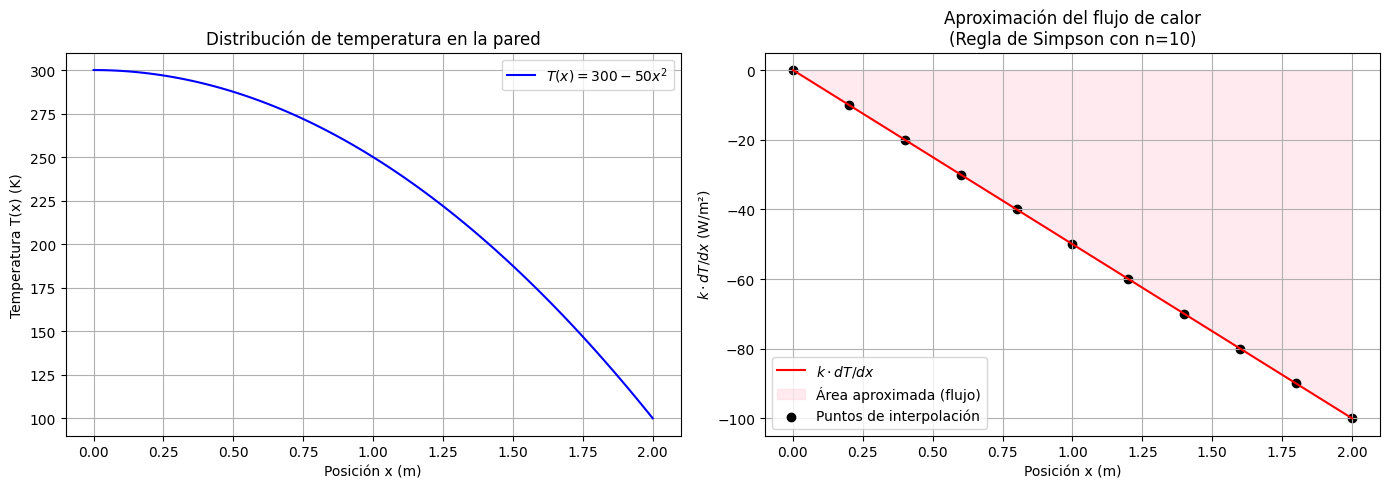

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # Puntos del intervalo
    fx = f(x)  # Evaluamos la función en esos puntos

    # Regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])

    return integral

# Parámetros del problema
k = 0.5  # Conductividad térmica en W/(m·K)
x1, x2 = 0, 2  # Posiciones inicial y final en metros

# Función que define la distribución de temperatura T(x) = 300 - 50x^2
def temperatura(x):
    return 300 - 50 * x**2

# Derivada de la temperatura (dT/dx)
def derivada_temperatura(x):
    return -100 * x  # Derivada de 300 - 50x^2 es -100x

# Función para calcular el integrando k*(dT/dx)
def funcion_integrando(x):
    return k * derivada_temperatura(x)

# Solución analítica para comparación
def flujo_analitico(x1, x2):
    return k * (temperatura(x2) - temperatura(x1))

sol_analitica = flujo_analitico(x1, x2)
print(f"Solución analítica del flujo de calor: {sol_analitica:.4f} W\n")

# Valores de n a probar
n_values = [6, 10, 20, 30]

# Calcular para diferentes valores de n
for n in n_values:
    resultado = simpson_rule(funcion_integrando, x1, x2, n)
    error = abs(resultado - sol_analitica)
    print(f"n = {n}:")
    print(f"  Aproximación Simpson: {resultado:.6f} W")
    print(f"  Error absoluto: {error:.6f} W")
    print(f"  Error relativo: {error/sol_analitica*100:.6f} %\n")

# Gráficas
plt.figure(figsize=(14, 5))

# Gráfica 1: Distribución de temperatura
plt.subplot(1, 2, 1)
x_vals = np.linspace(x1, x2, 100)
t_vals = temperatura(x_vals)
plt.plot(x_vals, t_vals, label=r"$T(x) = 300 - 50x^2$", color="blue")
plt.xlabel("Posición x (m)")
plt.ylabel("Temperatura T(x) (K)")
plt.title("Distribución de temperatura en la pared")
plt.legend()
plt.grid()

# Gráfica 2: Flujo de calor y aproximación (n=10 como ejemplo)
n_ejemplo = 10
plt.subplot(1, 2, 2)
x_vals = np.linspace(x1, x2, 100)
q_vals = funcion_integrando(x_vals)
plt.plot(x_vals, q_vals, label=r"$k \cdot dT/dx$", color="red")
plt.fill_between(x_vals, q_vals, alpha=0.3, color="pink", label="Área aproximada (flujo)")
plt.scatter(np.linspace(x1, x2, n_ejemplo+1),
            funcion_integrando(np.linspace(x1, x2, n_ejemplo+1)),
            color="black", label="Puntos de interpolación")
plt.xlabel("Posición x (m)")
plt.ylabel(r"$k \cdot dT/dx$ (W/m²)")
plt.title("Aproximación del flujo de calor\n(Regla de Simpson con n=10)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig("flujo_calor.png")
plt.show()